## Gleeful Consulting


John “jazz fingers” Johnson was a glee club coach that took his team “Joyful Noise” to 7 national championships. John has decided to try his hand at consulting. The glee club competition business has become so competitive that schools are paying consultants anywhere from \$1,000 - \$20,000 to help their teams perform better. After consulting for a year, John has discovered that no matter how much a team improves; his reputation only improves by consulting with winners. So John decides to try to figure out how to predict which teams are going to be winners at their regional competitions. John gathers all the data he can from the NACGC (National Association of Competitive Glee Clubs) about the teams that competed in regional competitions across the country to attempt to predict which teams are winners.

Glee club (or show choir) regional competitions are judged on a 5 point scale in a number of areas so that each team gets an average score somewhere between 0 and 5. John has decided to pick 4.25 as his cut off. He only wants to consult for teams that will score above his cut off.

Show choir consulting can be rather expensive. John needs to observe and record each team member individually and survey the school as a whole to discover any hidden talents. He also generally records 2 of their performances for later assessment. John’s videographer charges him \$200 for each group performance that is recorded and \$25 for each individual performance that is recorded. John spends about 5 hours reviewing the group performance and about 30 minutes each reviewing each individual performance. After he looks at the video, John spends about 4 hours working with the team immediately, provides them with his feedback and comes back 2 weeks later to watch them for another 2 hours to see how they have improved. He also spends about 20 minutes with each team member to share his feedback with them on their individual strengths and weaknesses. For all of this Gleeful Consulting pays John \$40/hour for his time. Finally John generally has to fly himself and the videographer to the team’s town for about \$221 round trip and pays for a hotel room for himself (the videographer handles her own arrangements) for about \$49 for one night. Surveying the school means administering an online survey to the school population that costs \$.25 per person. The survey company then charges \$200 to process the results of the survey.

A) Identify the relevant factors for predicting eventual performance.

B) Build a model that will help John predict what which teams will be winners

 



In [1]:
import numpy as np
import pandas as pd 

In [2]:
location = '../GleeClubData.xlsx'
df = pd.read_excel(location)
df.head() 

,team size,male/female ratio of team,enrollment in school,male/female ratio of School,population of district served by school,# of practices per month,# of competitions before regionals,Regionals Score
0,9,1.1,469,0.5,11432,1,3,3.160421
1,12,0.9,2028,1.1,64874,12,7,4.789190
2,23,1.4,1393,1.4,13843,10,3,3.676977
3,17,0.9,425,0.8,40959,9,0,3.641177
4,37,0.5,2111,1.0,26203,15,4,4.164019


In [3]:
df.shape

(300, 8)

In [4]:
df.isnull().sum()

team size                                  0
male/female ratio of team                  0
enrollment in school                       0
male/female ratio of School                0
population of district served by school    0
# of practices per month                   0
# of competitions before regionals         0
Regionals Score                            0
dtype: int64

In [5]:
glee_hopeful = df[df['Regionals Score'] >= 4.25]
glee_hopeful.shape

(49, 8)

In [6]:
df['enrollment_ratio'] = df['population of district served by school'] / df['enrollment in school']

In [7]:
df['team_ratio'] = df['enrollment in school'] / df['team size']

In [8]:
df.corr()

,team size,male/female ratio of team,enrollment in school,male/female ratio of School,population of district served by school,# of practices per month,# of competitions before regionals,Regionals Score,enrollment_ratio,team_ratio
team size,1.000000,0.039261,-0.002032,-0.027581,-0.027813,0.017570,-0.017728,0.037383,0.018034,-0.567707
male/female ratio of team,0.039261,1.000000,0.014302,-0.022603,-0.043413,-0.039693,0.060830,-0.019025,-0.008848,-0.020136
enrollment in school,-0.002032,0.014302,1.000000,-0.007546,0.063731,-0.043782,-0.076423,0.031495,-0.459001,0.727158
male/female ratio of School,-0.027581,-0.022603,-0.007546,1.000000,0.030516,0.002079,-0.048233,0.004502,0.018377,0.027771
population of district served by school,-0.027813,-0.043413,0.063731,0.030516,1.000000,0.018413,-0.083559,0.437973,0.729673,0.053617
# of practices per month,0.017570,-0.039693,-0.043782,0.002079,0.018413,1.000000,0.028975,0.634882,0.013112,-0.046577
# of competitions before regionals,-0.017728,0.060830,-0.076423,-0.048233,-0.083559,0.028975,1.000000,0.474863,-0.040778,-0.057573
Regionals Score,0.037383,-0.019025,0.031495,0.004502,0.437973,0.634882,0.474863,1.000000,0.302020,-0.004259
enrollment_ratio,0.018034,-0.008848,-0.459001,0.018377,0.729673,0.013112,-0.040778,0.302020,1.000000,-0.363425
team_ratio,-0.567707,-0.020136,0.727158,0.027771,0.053617,-0.046577,-0.057573,-0.004259,-0.363425,1.000000


In [9]:
score = df['Regionals Score']
population = df['population of district served by school'] /1000 
practice = df['# of practices per month']
experience = df['# of competitions before regionals'] 

In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt 

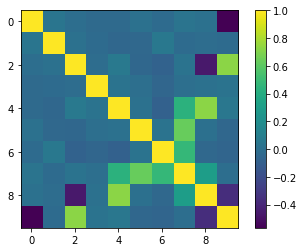

In [11]:
plt.imshow(df.corr())
plt.colorbar()
plt.show() 

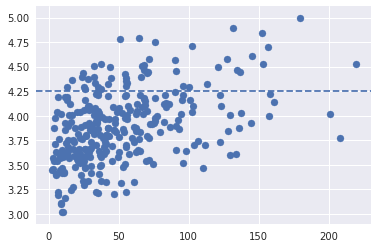

In [21]:
scr_cutoff = 4.25 
def scatterplot(xx, yy): 
    plt.scatter(xx, yy)
    plt.axhline(y = scr_cutoff, linestyle = '--')
    plt.show() 

scatterplot(population, score)

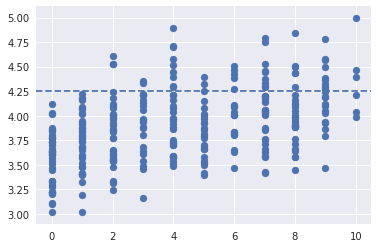

In [22]:
scatterplot(experience, score)

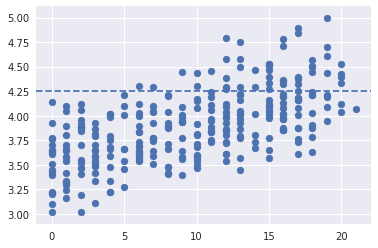

In [24]:
scatterplot(practice, score)

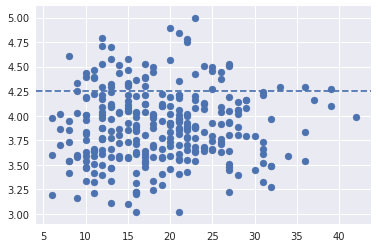

In [25]:
scatterplot(df['team size'], score)

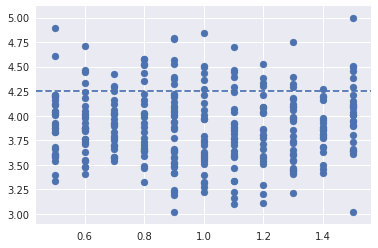

In [27]:
scatterplot(df['male/female ratio of team'], score) 

In [24]:
import statsmodels.formula.api as sm
result = sm.ols(data=df, formula = 'score ~ population + practice + experience + enrollment_ratio + team_ratio').fit() 
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     288.7
Date:                Wed, 03 Oct 2018   Prob (F-statistic):          3.86e-111
Time:                        11:24:35   Log-Likelihood:                 140.79
No. Observations:                 300   AIC:                            -269.6
Df Residuals:                     294   BIC:                            -247.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.0547      0.029  

In [26]:
import statsmodels.formula.api as sm
result = sm.ols(data=df, formula = 'score ~ population + practice + experience ').fit() 
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     478.9
Date:                Wed, 03 Oct 2018   Prob (F-statistic):          3.29e-113
Time:                        11:25:05   Log-Likelihood:                 139.35
No. Observations:                 300   AIC:                            -270.7
Df Residuals:                     296   BIC:                            -255.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0584      0.024    128.365      0.0

In [27]:
import statsmodels.formula.api as sm
result = sm.ols(data=df, formula = 'score ~ population + practice + experience - 1').fit() 
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     1057.
Date:                Wed, 03 Oct 2018   Prob (F-statistic):          4.17e-158
Time:                        11:25:18   Log-Likelihood:                -466.23
No. Observations:                 300   AIC:                             938.5
Df Residuals:                     297   BIC:                             949.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
population     0.0191      0.001     13.330      0.0

### Conclusion 

The winning teams have larger population served by school, higher number of practices per month, 
higher number of participated competitions before regionals. 

The winning formula will be 

Regional Score = 0.0191 * population served by school ( in 1000's) 
      + 0.1462 * number of practice by per month 
      + 0.2619 * number of competitions before regionals 